In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
sales_df = pd.read_csv(r'C:\Users\Mcc\Downloads\online_retail_sales_dataset.csv')

In [3]:
sales_df.head()

,transaction_id,timestamp,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount
0,1,2023-01-01 00:00:00,1993,915,Home & Kitchen,8,103.30,0.23,Gift Card,27,Female,North America,636.33
1,2,2023-01-01 00:01:00,3474,553,Clothing,9,180.28,0.31,Gift Card,53,Other,South America,1119.54
2,3,2023-01-01 00:02:00,4564,248,Beauty & Personal Care,7,81.58,0.27,Debit Card,34,Other,North America,416.87
3,4,2023-01-01 00:03:00,1133,948,Clothing,3,235.20,0.00,Debit Card,50,Other,Australia,705.60
4,5,2023-01-01 00:04:00,3626,284,Books,9,453.00,0.34,Credit Card,23,Female,Australia,2690.82


In [4]:
# check shape of data
sales_df.shape

(1000000, 13)

In [5]:
# how many columns in our dataset and check columns 
sales_df.columns

Index(['transaction_id', 'timestamp', 'customer_id', 'product_id',
       'product_category', 'quantity', 'price', 'discount', 'payment_method',
       'customer_age', 'customer_gender', 'customer_location', 'total_amount'],
      dtype='object')

In [6]:
# check duplicated values each columns  # and there are not duplicate values in dataset
sales_df.isnull().sum()

transaction_id       0
timestamp            0
customer_id          0
product_id           0
product_category     0
quantity             0
price                0
discount             0
payment_method       0
customer_age         0
customer_gender      0
customer_location    0
total_amount         0
dtype: int64

In [7]:
# check duplicates values in dataset there are not duplicate values in dataset

sales_df.duplicated().sum()

0

In [8]:
# check data type each column 
sales_df.dtypes

transaction_id         int64
timestamp             object
customer_id            int64
product_id             int64
product_category      object
quantity               int64
price                float64
discount             float64
payment_method        object
customer_age           int64
customer_gender       object
customer_location     object
total_amount         float64
dtype: object

In [9]:
# information of dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   transaction_id     1000000 non-null  int64  
 1   timestamp          1000000 non-null  object 
 2   customer_id        1000000 non-null  int64  
 3   product_id         1000000 non-null  int64  
 4   product_category   1000000 non-null  object 
 5   quantity           1000000 non-null  int64  
 6   price              1000000 non-null  float64
 7   discount           1000000 non-null  float64
 8   payment_method     1000000 non-null  object 
 9   customer_age       1000000 non-null  int64  
 10  customer_gender    1000000 non-null  object 
 11  customer_location  1000000 non-null  object 
 12  total_amount       1000000 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 99.2+ MB


In [10]:
# describe of dataset
sales_df.describe()

,transaction_id,customer_id,product_id,quantity,price,discount,customer_age,total_amount
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,2998.854163,549.804766,5.003086,252.445705,0.250204,43.508625,946.839858
std,288675.278933,1154.764311,259.848068,2.581004,142.868633,0.144384,15.007346,810.902205
min,1.000000,1000.000000,100.000000,1.000000,5.000000,0.000000,18.000000,2.560000
25%,250000.750000,1999.000000,325.000000,3.000000,128.690000,0.130000,31.000000,297.180000
50%,500000.500000,2999.000000,550.000000,5.000000,252.700000,0.250000,44.000000,715.710000
75%,750000.250000,3998.000000,775.000000,7.000000,375.990000,0.380000,57.000000,1397.750000
max,1000000.000000,4999.000000,999.000000,9.000000,500.000000,0.500000,69.000000,4496.130000


In [11]:
# convert multiple columns in int

sales_df['quantity']=sales_df['quantity'].astype(int)

sales_df['price'] = sales_df['price'].astype(int)

sales_df['total_amount'] = sales_df['total_amount'].astype(int)

In [12]:
# convert timestamp column in date and time 
# Extract year and month 
sales_df['timestamp']=pd.to_datetime(sales_df['timestamp'],format="%Y-%m-%d %H:%M:%S")
sales_df['Year'] = sales_df['timestamp'].dt.year
sales_df['Month'] = sales_df['timestamp'].dt.month 

# Extract time, hours, minutes,
sales_df['Time'] = sales_df['timestamp'].dt.time
sales_df['Hour'] = sales_df['timestamp'].dt.hour


In [13]:
# Calculate total sales amount after applying discount
sales_df['total_sales'] = sales_df['quantity'] * sales_df['price'] * (1 - sales_df['discount'])

In [14]:
# convert sales data type
sales_df['total_sales'] = sales_df['total_sales'].astype(int)

# Exploratory Data Analysis

Text(0.5, 1.0, 'count of product category')

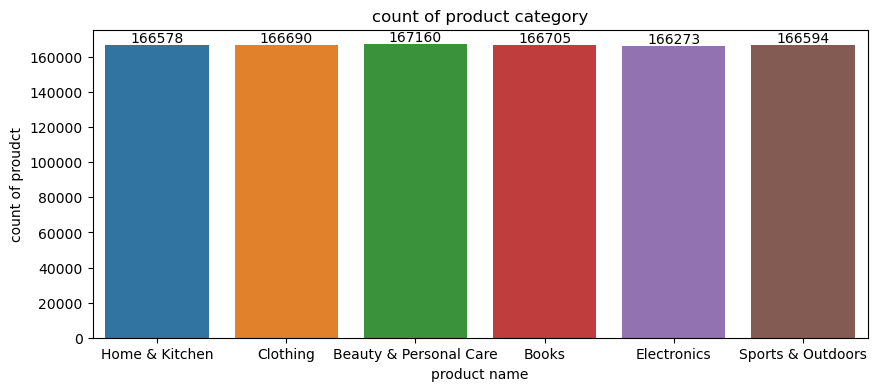

In [15]:
# count of product category
plt.figure(figsize=(10,4))
ax=sns.countplot(data=sales_df,x='product_category')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel('product name')    
plt.ylabel('count of proudct')
plt.title('count of product category')    

Text(0.5, 1.0, 'Count Of Payment Method')

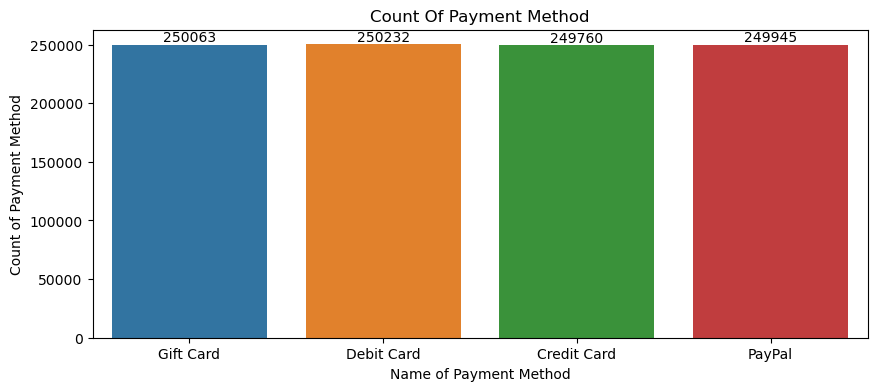

In [16]:
# count of payment method 
plt.figure(figsize=(10,4))
ax=sns.countplot(data=sales_df,x='payment_method')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel('Name of Payment Method')
plt.ylabel('Count of Payment Method')
plt.title('Count Of Payment Method')

Text(0.5, 1.0, 'Count Of Cusomer_Gender')

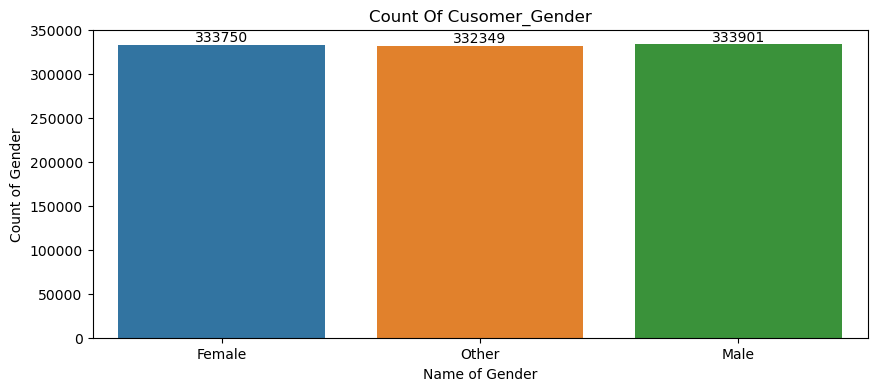

In [17]:
# count of customer gender 
plt.figure(figsize=(10,4))
ax=sns.countplot(data=sales_df,x='customer_gender')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel('Name of Gender')
plt.ylabel('Count of Gender')
plt.title('Count Of Cusomer_Gender')

<Axes: >

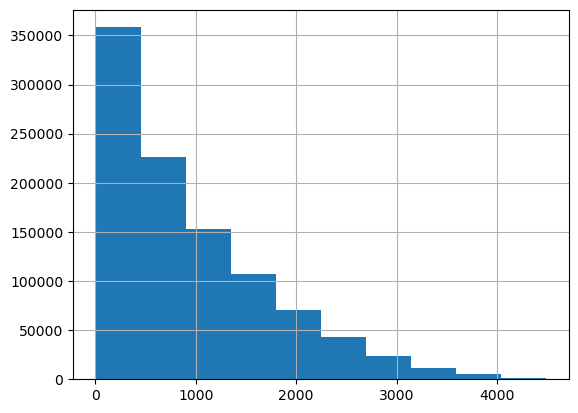

In [18]:
# total_sales create a histplot 
sales_df['total_sales'].hist()

<Axes: >

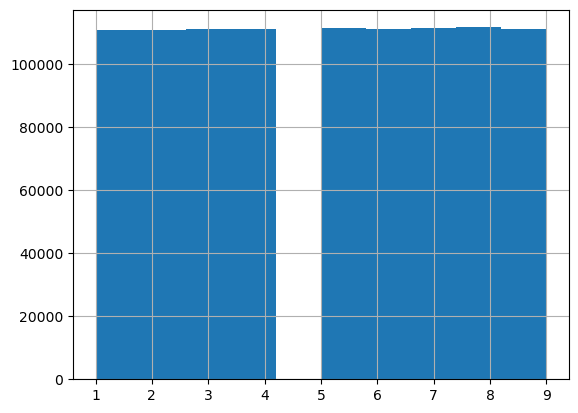

In [19]:

sales_df['quantity'].hist()

<Axes: >

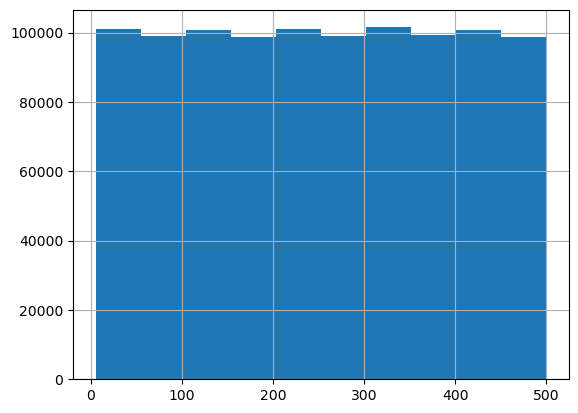

In [20]:
sales_df['price'].hist()

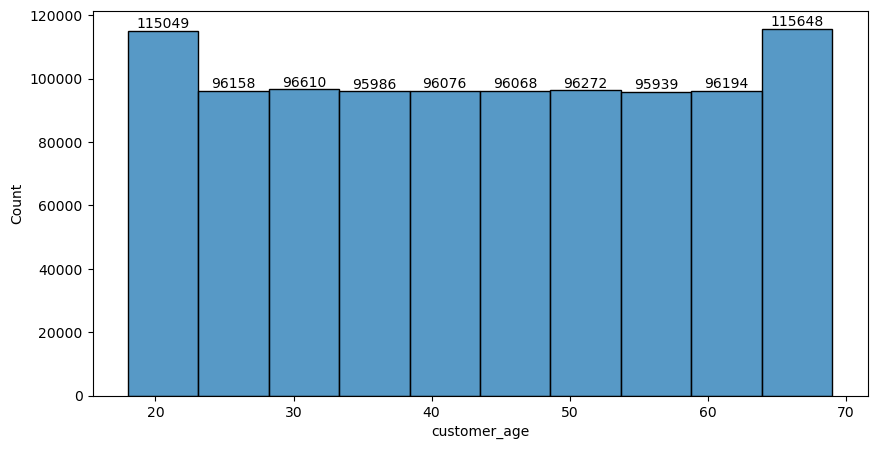

In [21]:
# count of customers by based on the age
plt.figure(figsize=(10,5))
ax=sns.histplot(data=sales_df,x='customer_age',bins=10)
for bars in ax.containers:
    ax.bar_label(bars)

         product_category  total_amount
0  Beauty & Personal Care     158302022
1                   Books     157597327
2                Clothing     157835843
3             Electronics     157240907
4          Home & Kitchen     157078947
5       Sports & Outdoors     158289899


Text(0.5, 1.0, 'Sum Of Total Sales Amount By Prouduct Category')

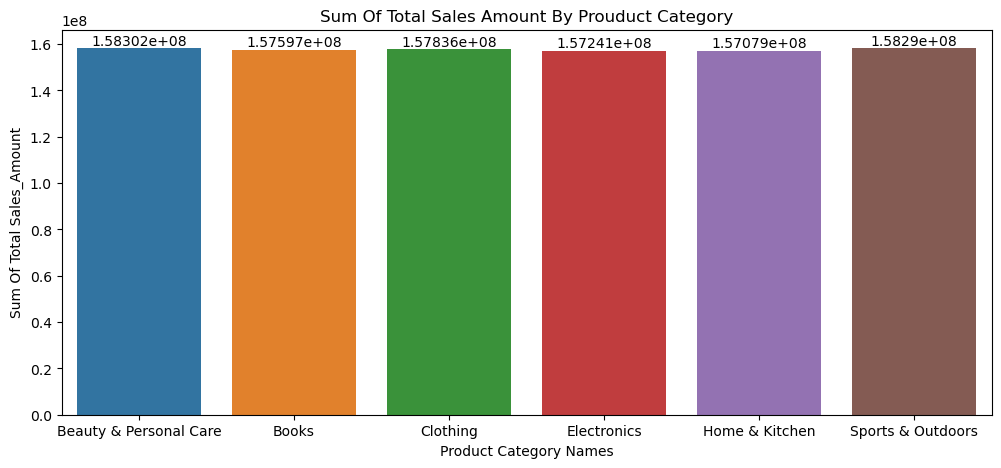

In [22]:
# sum of total_amount by product_category
plt.figure(figsize=(12,5))
total_amount =sales_df.groupby('product_category')['total_amount'].sum().reset_index()
print(total_amount)
ax=sns.barplot(data=total_amount,x='product_category',y='total_amount')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Product Category Names')    
plt.ylabel('Sum Of Total Sales_Amount')
plt.title('Sum Of Total Sales Amount By Prouduct Category')

total sum of total_sales amount by Paymet Method 

                total_sales
payment_method             
Credit Card       235771855
Debit Card        235958331
Gift Card         237288276
PayPal            235503843


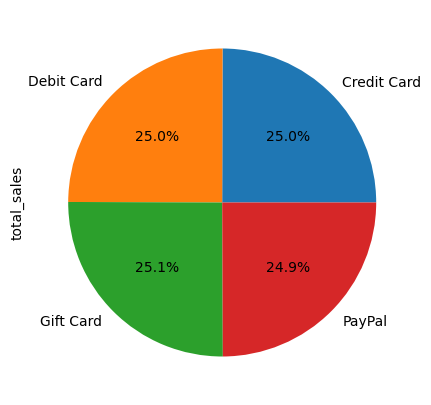

In [23]:
# total sum of total_sales amount by Payment Method 
plt.figure(figsize=(12,5))
total_amount = sales_df.groupby('payment_method')[['total_sales']].sum()
print(total_amount)

# create a pie chart

total_amount = sales_df.groupby('payment_method')['total_sales'].sum().plot(kind='pie',autopct='%1.1f%%')

sum of total sales by gender 

  customer_gender  total_sales
0          Female    315382028
1            Male    315315194
2           Other    313825083


Text(0.5, 1.0, 'Sum Of Total Sales By Gender Wise')

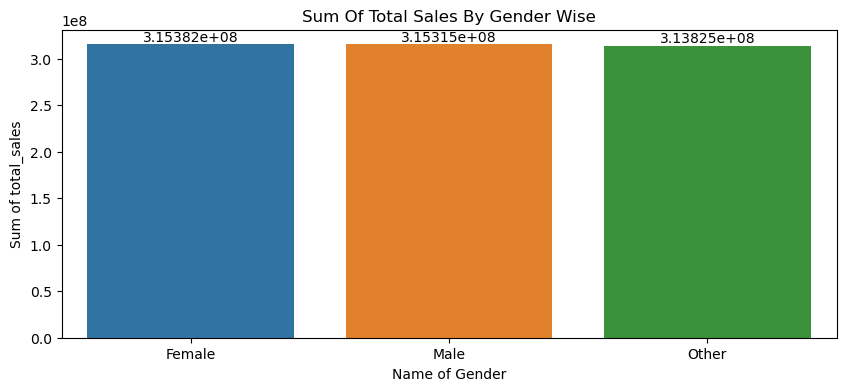

In [24]:
# sum fo total sales by gender wise 
# create a bar plot 
plt.figure(figsize=(10,4))
total_sum = sales_df.groupby('customer_gender')['total_sales'].sum().reset_index()
ax=sns.barplot(data=total_sum,x='customer_gender',y='total_sales')
for bars in ax.containers:
    ax.bar_label(bars)
print(total_sum) 
plt.xlabel('Name of Gender')
plt.ylabel('Sum of total_sales')
plt.title('Sum Of Total Sales By Gender Wise')

                   total_sales
customer_location             
Africa               157529597
Asia                 157086048
Australia            157688374
Europe               157519470
North America        157006532
South America        157692284


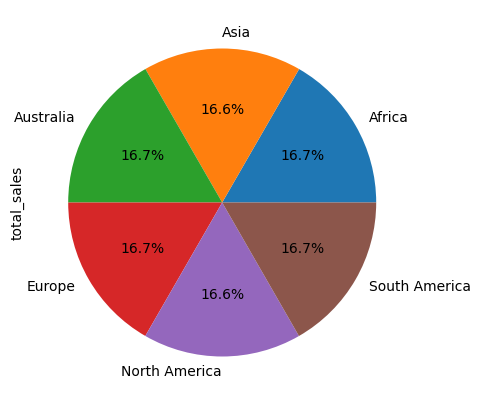

In [25]:
# total sum of total_sales amount by customer_location 
plt.figure(figsize=(12,5))
total_amount = sales_df.groupby('customer_location')[['total_sales']].sum()
print(total_amount)

# create a pie chart

total_amount = sales_df.groupby('customer_location')['total_sales'].sum().plot(kind='pie',autopct='%1.1f%%')

Sum of Year wise sales 

   Year  total_sales
0  2023    497289538
1  2024    447232767


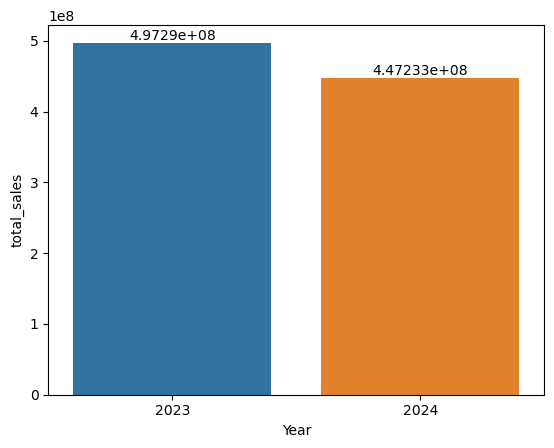

In [26]:
# total sales by year wise which year highest sales 
sum_sales = sales_df.groupby('Year')['total_sales'].sum().reset_index()

# create a bar chat show our data easly
ax=sns.barplot(data=sum_sales,x='Year',y='total_sales')
for bars in ax.containers:
    ax.bar_label(bars)
print(sum_sales)    

In [27]:
# total sales by year wise which year highest sales 
plt.figure(figsize=(20,5))
sum_sales = sales_df.groupby(['Year','Month'])['total_sales'].sum().reset_index()
print(sum_sales)

    Year  Month  total_sales
0   2023      1     42215266
1   2023      2     38177449
2   2023      3     42271596
3   2023      4     40946356
4   2023      5     42132218
5   2023      6     40960583
6   2023      7     42360364
7   2023      8     42120774
8   2023      9     41066213
9   2023     10     41878526
10  2023     11     41228335
11  2023     12     41931858
12  2024      1     42057149
13  2024      2     39188061
14  2024      3     42061952
15  2024      4     40519288
16  2024      5     42048257
17  2024      6     40989026
18  2024      7     41976077
19  2024      8     42331689
20  2024      9     40885773
21  2024     10     42088182
22  2024     11     33087313


<Figure size 2000x500 with 0 Axes>

highest sales which customer location and which year 

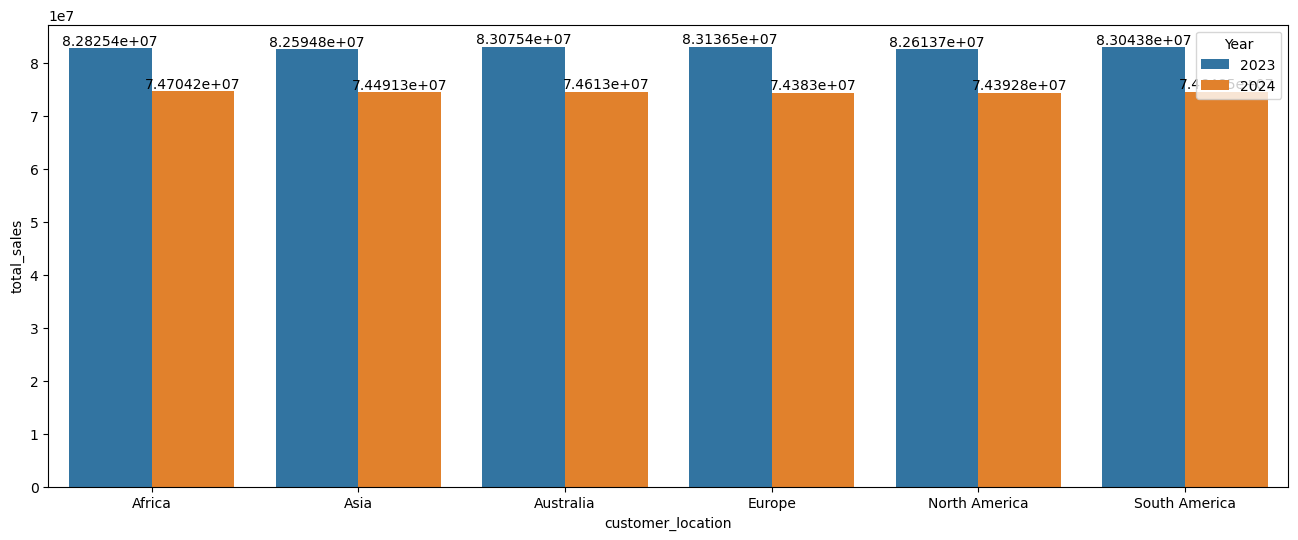

In [28]:
# highest sales which customer location 
plt.figure(figsize=(16,6))
highest_sales  = sales_df.groupby(['Year','customer_location'])['total_sales'].sum().reset_index()

# creata a bar chart 

ax=sns.barplot(data=highest_sales,x='customer_location',y='total_sales',hue='Year')
for bars in ax.containers:
    ax.bar_label(bars)

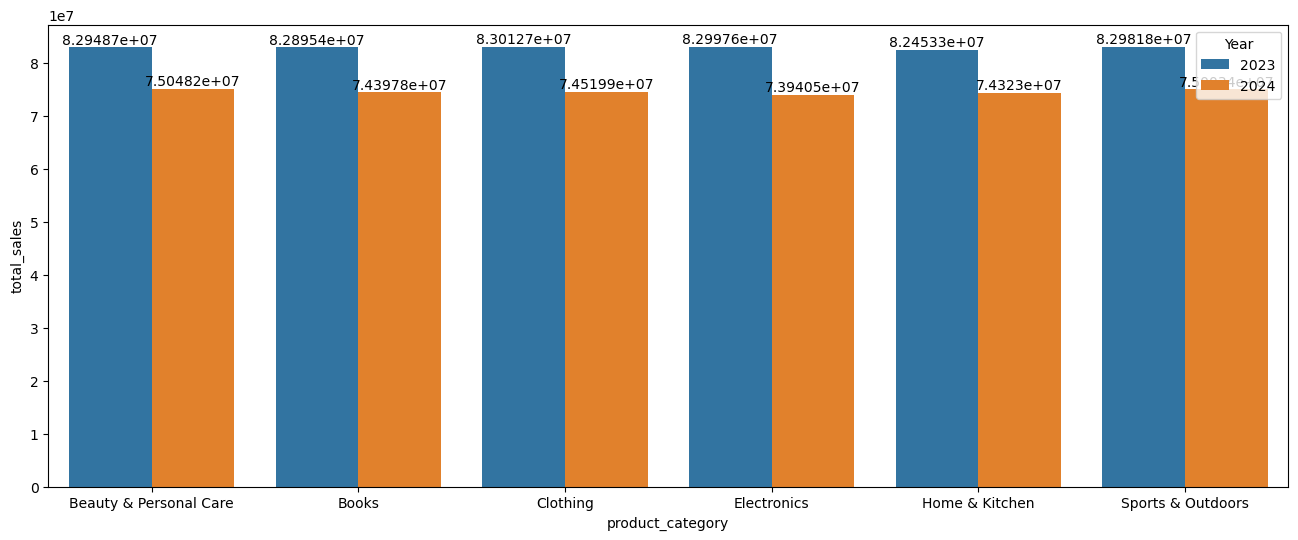

In [29]:
# highest sales which product category by Year wise 
plt.figure(figsize=(16,6))
highest_sales  = sales_df.groupby(['Year','product_category'])['total_sales'].sum().reset_index()

# creata a bar chart 

ax=sns.barplot(data=highest_sales,x='product_category',y='total_sales',hue='Year')
for bars in ax.containers:
    ax.bar_label(bars)

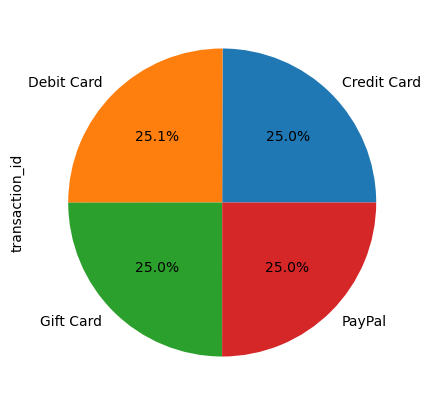

In [30]:
# which Payment method by  highest transaction in precentage

plt.figure(figsize=(12,5))
total_transaction = sales_df.groupby(['payment_method'])[['transaction_id']].sum()

# create a pie chart

total_transaction = sales_df.groupby(['payment_method'])['transaction_id'].sum().plot(kind='pie',autopct='%1.1f%%')

which product bought by gender wise 

   customer_gender        product_category  total_sales
0           Female  Beauty & Personal Care     52624328
1           Female                   Books     52767730
2           Female                Clothing     52681672
3           Female             Electronics     52334123
4           Female          Home & Kitchen     52431799
5           Female       Sports & Outdoors     52542376
6             Male  Beauty & Personal Care     52809691
7             Male                   Books     52449698
8             Male                Clothing     52647412
9             Male             Electronics     52260531
10            Male          Home & Kitchen     52276531
11            Male       Sports & Outdoors     52871331
12           Other  Beauty & Personal Care     52562872
13           Other                   Books     52075764
14           Other                Clothing     52203509
15           Other             Electronics     52343463
16           Other          Home & Kitchen     5

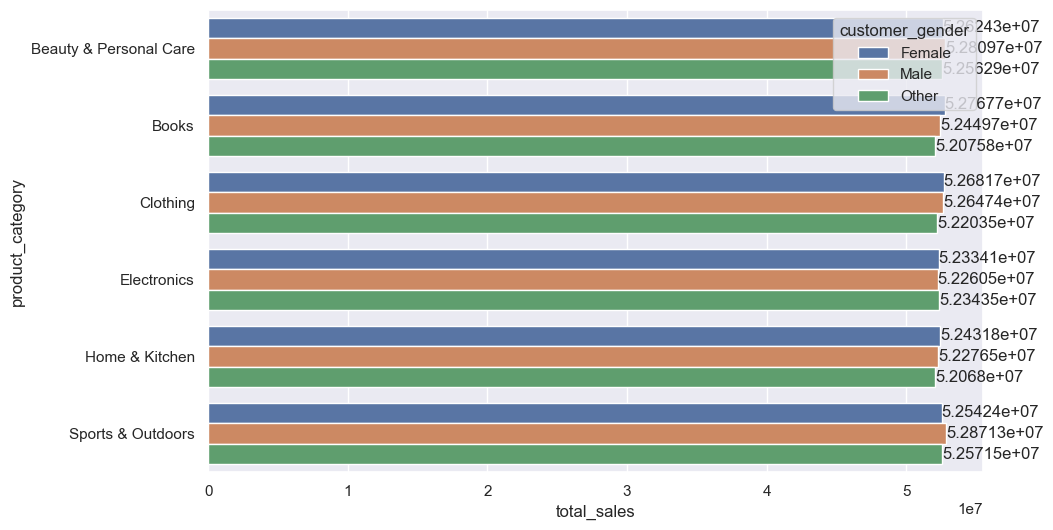

In [31]:
# highest buy product and which gender wise 
sns.set_theme(rc={'figure.figsize':(10,6)})
product_sales = sales_df.groupby(['customer_gender','product_category'])['total_sales'].sum().reset_index()

# create a bar plot

ax=sns.barplot(data=product_sales,hue='customer_gender',x='total_sales',y='product_category')
for bars in ax.containers:
    ax.bar_label(bars)
print(product_sales)    

Average of the product category which category highest price amount 

In [34]:
# Average of the product category
product_average = sales_df.groupby('product_category')['price'].mean().reset_index()
print(product_average)

         product_category       price
0  Beauty & Personal Care  252.105091
1                   Books  251.715983
2                Clothing  252.218153
3             Electronics  251.732356
4          Home & Kitchen  251.950540
5       Sports & Outdoors  251.981830


which product_categery maximum discount 

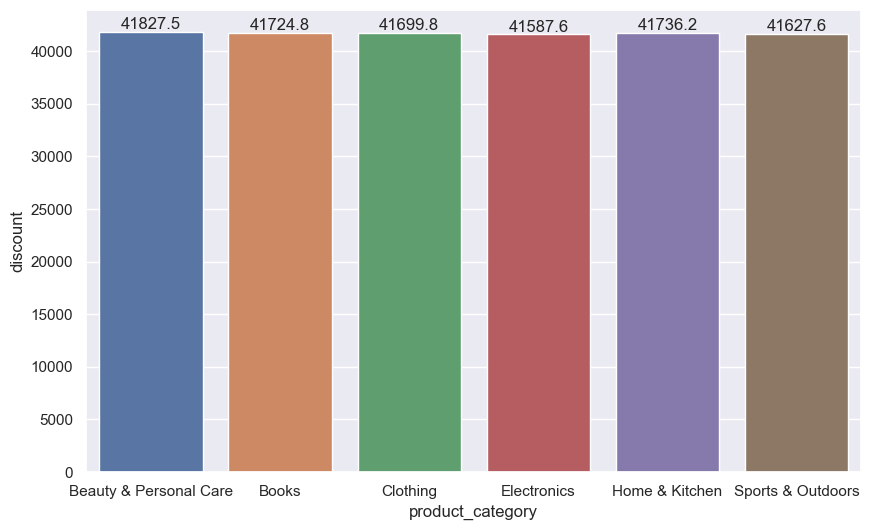

In [45]:
# sum of disocunt which product category given
sum_discount = sales_df.groupby('product_category')['discount'].sum().reset_index()
ax=sns.barplot(data=sum_discount ,x='product_category',y='discount')
for bars in ax.containers:
    ax.bar_label(bars)

In [49]:
# sum of total amount and total sales and price and quantity 
total_sum = sales_df.groupby('Year')[['quantity','price','total_amount','total_sales']].sum().reset_index()
print(total_sum)

   Year  quantity      price  total_amount  total_sales
0  2023   2631912  132531411     498248286    497289538
1  2024   2371174  119419405     448096659    447232767


In [51]:
# sum of total amount and total sales and price and quantity  by customer location
total_sum = sales_df.groupby(['Year','customer_location'])[['quantity','price','total_amount','total_sales']].sum().reset_index()
print(total_sum)

    Year customer_location  quantity     price  total_amount  total_sales
0   2023            Africa    438494  22034266      82984829     82825387
1   2023              Asia    439536  22022401      82754885     82594776
2   2023         Australia    439505  22157931      83235232     83075374
3   2023            Europe    439535  22118537      83296576     83136499
4   2023     North America    436682  22046370      82773061     82613748
5   2023     South America    438160  22151906      83203703     83043754
6   2024            Africa    395537  19928334      74848134     74704210
7   2024              Asia    395720  19791494      74635481     74491272
8   2024         Australia    395553  19967117      74757002     74613000
9   2024            Europe    395041  19847974      74527080     74382971
10  2024     North America    394843  19900768      74536765     74392784
11  2024     South America    394480  19983718      74792197     74648530
